In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import os
from tqdm.notebook import tqdm

In [2]:
def make_graph(l, inv_ks,vlen=100,pot=None):
    if pot is None:
        pot = lambda n: n**2
    vn = np.einsum('i,j->ij', inv_ks, pot(np.arange(vlen)))
    graph = py_gauge_mc.GPUGaugeTheory(l,l,l,l,vn.astype(np.float32))
    return graph

In [3]:
@np.vectorize
def pot(n):
    if n == 0:
        return 0.0
    elif n == 1:
        return 1.0
    else:
        return 50.0

In [4]:
inv_ks = np.linspace(0.1,1.0,64)

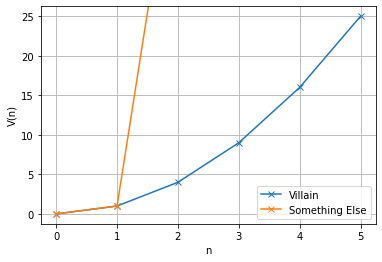

In [5]:
plt.plot(np.arange(6), np.arange(6)**2, 'x-', label='Villain')
ylim = plt.ylim()
plt.plot(np.arange(6), pot(np.arange(6)), 'x-', label='Something Else')
plt.ylim(ylim)
plt.grid()
plt.xlabel('n')
plt.ylabel('V(n)')
plt.legend()
plt.show()

In [6]:
graph = make_graph(8, inv_ks, pot=pot)
graph.simulate(steps=100,local_updates_per_step=10,run_parallel_tempering=True)
energies = graph.simulate_and_get_energies(1000,local_updates_per_step=10,steps_per_sample=100,run_parallel_tempering=True)

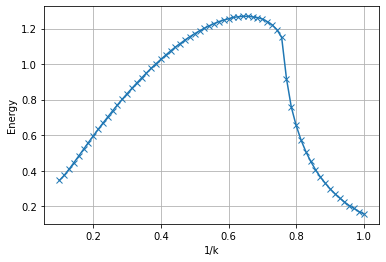

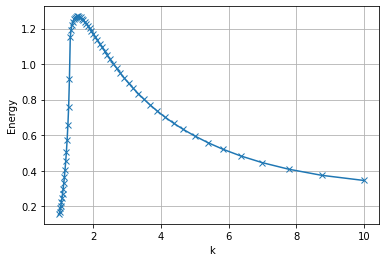

In [7]:
plt.plot(inv_ks, energies.mean(axis=-1) / 8**4, 'x-')
plt.grid()
plt.xlabel('1/k')
plt.ylabel('Energy')
plt.show()

plt.plot(1./inv_ks, energies.mean(axis=-1) / 8**4, 'x-')
plt.grid()
plt.xlabel('k')
plt.ylabel('Energy')
plt.show()

In [8]:
graph = make_graph(8, inv_ks, pot=pot)
graph.simulate(steps=100,local_updates_per_step=10,run_parallel_tempering=True)
w_v_par = graph.simulate_and_get_winding_variance(1000,local_updates_per_step=10,steps_per_sample=100,run_parallel_tempering=True)

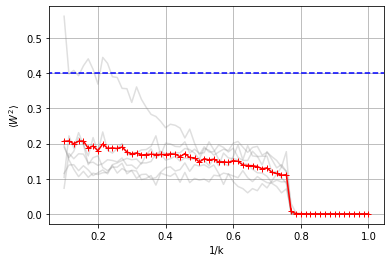

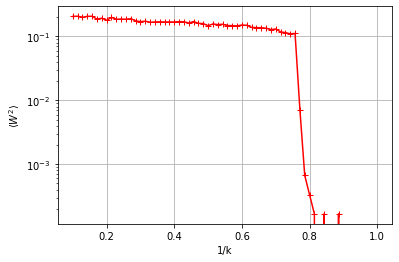

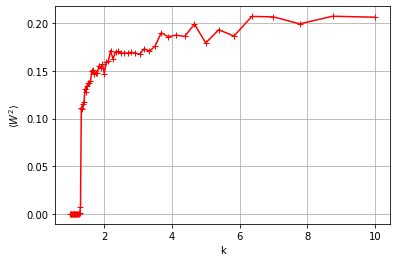

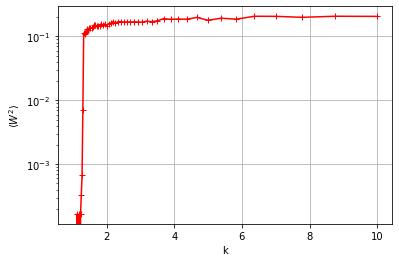

In [9]:
for i in range(w_v_par.shape[-1]):
    plt.plot(inv_ks, w_v_par[:,i], c='gray', alpha=0.25)

w_v_par_var = w_v_par.mean(axis=-1)
    
plt.plot(inv_ks, w_v_par_var, '+-', c='red')
plt.grid()
xlims = plt.xlim()
ylims = plt.ylim()
plt.plot([-100,100], [0.4,0.4], '--', c='blue')
plt.plot(inv_ks, 1/inv_ks, '--', c='gray')
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('1/k')
plt.ylabel(r'$\langle W^2 \rangle$')
plt.show()

plt.plot(inv_ks, w_v_par_var, '+-', c='red')
plt.grid()
plt.yscale('log')
xlims = plt.xlim()
ylims = plt.ylim()
plt.plot([-100,100], [0.4,0.4], '--', c='blue')
plt.plot(inv_ks, 1/inv_ks, '--', c='gray')
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('1/k')
plt.ylabel(r'$\langle W^2 \rangle$')
plt.show()

plt.plot(1./inv_ks, w_v_par_var,'+-',  c='red')
plt.grid()
xlims = plt.xlim()
ylims = plt.ylim()
plt.plot([-100,100], [0.4,0.4], '--', c='blue')
plt.plot(1/inv_ks, 1/inv_ks, '--', c='gray')
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('k')
plt.ylabel(r'$\langle W^2 \rangle$')
plt.show()

plt.plot(1./inv_ks, w_v_par_var,'+-',  c='red')
plt.grid()
plt.yscale('log')
xlims = plt.xlim()
ylims = plt.ylim()
plt.plot([-100,100], [0.4,0.4], '--', c='blue')
plt.plot(1/inv_ks, 1/inv_ks, '--', c='gray')
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('k')
plt.ylabel(r'$\langle W^2 \rangle$')
plt.show()

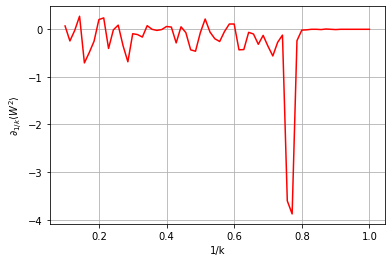

/tmp/ipykernel_46406/484359923.py:9: RuntimeWarning: divide by zero encountered in true_divide
  grad = np.gradient(w_v_par.mean(axis=-1), inv_ks) / w_v_par.mean(axis=-1)
/tmp/ipykernel_46406/484359923.py:9: RuntimeWarning: invalid value encountered in true_divide
  grad = np.gradient(w_v_par.mean(axis=-1), inv_ks) / w_v_par.mean(axis=-1)


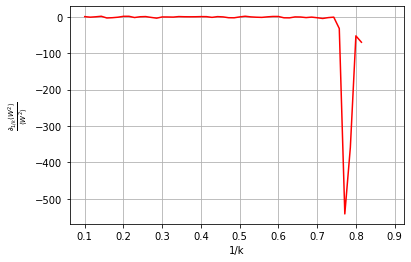

In [10]:
grad = np.gradient(w_v_par.mean(axis=-1), inv_ks)

plt.plot(inv_ks, grad, c='red')
plt.grid()
plt.xlabel('1/k')
plt.ylabel(r'$\partial_{1/k} \langle W^2 \rangle$')
plt.show()

grad = np.gradient(w_v_par.mean(axis=-1), inv_ks) / w_v_par.mean(axis=-1)

plt.plot(inv_ks, grad, c='red')
plt.xlabel('1/k')
plt.ylabel(r'$\frac{\partial_{1/k} \langle W^2 \rangle}{\langle W^2 \rangle}$')
plt.grid()
plt.show()

Approximate $\alpha_c$

In [33]:
meanval = w_v_par.mean(axis=-1)
grad_fixed = grad.copy()
grad_fixed[np.logical_or(np.isfinite(grad_fixed), np.isnan(grad_fixed))] = 0
meanval[np.argmax(np.abs(grad))]

SyntaxError: invalid syntax (251868234.py, line 3)

In [20]:
meanval

array([2.06500000e-01, 2.07500000e-01, 1.99500000e-01, 2.06833333e-01,
       2.07333333e-01, 1.86666667e-01, 1.93333333e-01, 1.79500000e-01,
       1.99166667e-01, 1.86333333e-01, 1.87666667e-01, 1.86000000e-01,
       1.90166667e-01, 1.76166667e-01, 1.70666667e-01, 1.73500000e-01,
       1.67500000e-01, 1.68833333e-01, 1.69666667e-01, 1.68833333e-01,
       1.69000000e-01, 1.68666667e-01, 1.70666667e-01, 1.70000000e-01,
       1.62500000e-01, 1.71500000e-01, 1.60500000e-01, 1.59166667e-01,
       1.47333333e-01, 1.57166667e-01, 1.53500000e-01, 1.55500000e-01,
       1.47833333e-01, 1.48166667e-01, 1.46500000e-01, 1.51333333e-01,
       1.49666667e-01, 1.39000000e-01, 1.37500000e-01, 1.37166667e-01,
       1.34666667e-01, 1.28166667e-01, 1.31000000e-01, 1.18000000e-01,
       1.15000000e-01, 1.10166667e-01, 1.11500000e-01, 7.16666667e-03,
       6.66666667e-04, 3.33333333e-04, 1.66666667e-04, 0.00000000e+00,
       1.66666667e-04, 0.00000000e+00, 0.00000000e+00, 1.66666667e-04,
      